In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('market_raw_dirty.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2021-01-01,BTC,17856.23,18157.94,17984.22,18105.36,4528669.0
1,2021-01-02,BTC,18599.22,18279.29,18271.46,18278.58,5188740.0
2,2021-01-03,BTC,17575.83,18047.84,17241.18,17723.19,2421182.0
3,2021-01-04,BTC,18147.85,18498.81,17398.73,NaN,3390357.0
4,2021-01-05,BTC,18003.27,18156.59,17590.96,18046.47,4160299.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10234 non-null  object 
 1   Symbol  10234 non-null  object 
 2   Open    10234 non-null  object 
 3   High    10234 non-null  float64
 4   Low     10234 non-null  float64
 5   Close   10012 non-null  float64
 6   Volume  9976 non-null   float64
dtypes: float64(4), object(3)
memory usage: 559.8+ KB


In [59]:
df.isnull().sum()

Date        0
Symbol      0
Open        0
High        0
Low         0
Close     222
Volume    258
dtype: int64

In [60]:
df.dtypes

Date       object
Symbol     object
Open       object
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [61]:
df.describe()

,High,Low,Close,Volume
count,10234.000000,10234.000000,10012.000000,9.976000e+03
mean,24360.078791,23166.956128,23751.781060,3.504878e+06
std,21285.939231,20219.528786,20726.337285,2.009120e+06
min,767.240000,730.160000,758.650000,5.819000e+03
25%,10815.290000,10302.302500,10558.815000,1.801269e+06
50%,19367.865000,18430.375000,18897.715000,3.474126e+06
75%,30583.837500,29038.030000,29895.712500,5.253774e+06
max,122612.370000,117345.510000,118606.500000,6.998891e+06


In [62]:
df['Date']=pd.to_datetime(df['Date'])

In [63]:
df['Open'].value_counts()

Open
error       92
1170.91      2
35579.44     2
13482.64     2
996.05       2
            ..
79780.93     1
79848.61     1
74360.05     1
77528.35     1
14345.36     1
Name: count, Length: 10129, dtype: int64

In [64]:
df['Open']=pd.to_numeric(df['Open'],errors="coerce")

In [65]:
df.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [66]:
num_col=df.select_dtypes(float).columns

In [67]:
for col in num_col:
    pd.to_numeric(df[col],errors="coerce")
    

In [68]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2021-01-01,BTC,17856.23,18157.94,17984.22,18105.36,4528669.0
1,2021-01-02,BTC,18599.22,18279.29,18271.46,18278.58,5188740.0
2,2021-01-03,BTC,17575.83,18047.84,17241.18,17723.19,2421182.0
3,2021-01-04,BTC,18147.85,18498.81,17398.73,NaN,3390357.0
4,2021-01-05,BTC,18003.27,18156.59,17590.96,18046.47,4160299.0


In [69]:
df['Open'].isnull().sum()

np.int64(92)

In [70]:
df.isnull().sum()

Date        0
Symbol      0
Open       92
High        0
Low         0
Close     222
Volume    258
dtype: int64

In [71]:
for col in ["Open", "High", "Low", "Close"]:
    df.loc[df[col] <= 0, col] = np.nan


In [72]:
df.isnull().sum()

Date        0
Symbol      0
Open       92
High        0
Low         0
Close     222
Volume    258
dtype: int64

In [73]:
mv=df['Volume'].median()

In [74]:
df['Volume']=df['Volume'].fillna(mv)

In [75]:
df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].ffill()

In [76]:
df=df.sort_values(by=["Date","Symbol"])

In [77]:
df=df.reset_index(drop=True)

In [78]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2021-01-01,AAPL,908.14,939.56,898.44,918.10,6670055.0
1,2021-01-01,ADA,20868.65,22001.92,20192.28,21050.33,6707673.0
2,2021-01-01,AMZN,48261.49,50893.40,47081.08,48561.76,6294934.0
3,2021-01-01,BNB,36255.41,38420.07,36116.84,36697.61,2429383.0
4,2021-01-01,BTC,17856.23,18157.94,17984.22,18105.36,4528669.0


In [79]:
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Calculate daily Returns 

In [80]:
df['Return']=df.groupby('Symbol')['Close'].pct_change()

In [81]:
df.isnull().sum()

Date       0
Symbol     0
Open       0
High       0
Low        0
Close      0
Volume     0
Return    14
dtype: int64

# Rolling Volatility

In [82]:
df['Volatility_30']=df.groupby('Symbol')['Return'].rolling(window=30).std().reset_index(level=0,drop=True)

In [83]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Return,Volatility_30
0,2021-01-01,AAPL,908.14,939.56,898.44,918.10,6670055.0,NaN,NaN
1,2021-01-01,ADA,20868.65,22001.92,20192.28,21050.33,6707673.0,NaN,NaN
2,2021-01-01,AMZN,48261.49,50893.40,47081.08,48561.76,6294934.0,NaN,NaN
3,2021-01-01,BNB,36255.41,38420.07,36116.84,36697.61,2429383.0,NaN,NaN
4,2021-01-01,BTC,17856.23,18157.94,17984.22,18105.36,4528669.0,NaN,NaN


In [84]:
df.isnull().sum()

Date               0
Symbol             0
Open               0
High               0
Low                0
Close              0
Volume             0
Return            14
Volatility_30    420
dtype: int64

# Moving Averages

In [85]:
df['MA-20']=df.groupby('Symbol')['Close'].rolling(window=20).mean().reset_index(level=0,drop=True)

In [86]:
df['MA-50']=df.groupby('Symbol')['Close'].rolling(window=50).mean().reset_index(level=0,drop=True)

In [87]:
df['MA-200']=df.groupby('Symbol')['Close'].rolling(window=200).mean().reset_index(level=0,drop=True)

In [88]:
df.isnull().sum()

Date                0
Symbol              0
Open                0
High                0
Low                 0
Close               0
Volume              0
Return             14
Volatility_30     420
MA-20             266
MA-50             686
MA-200           2786
dtype: int64

# Price + Moving Averages

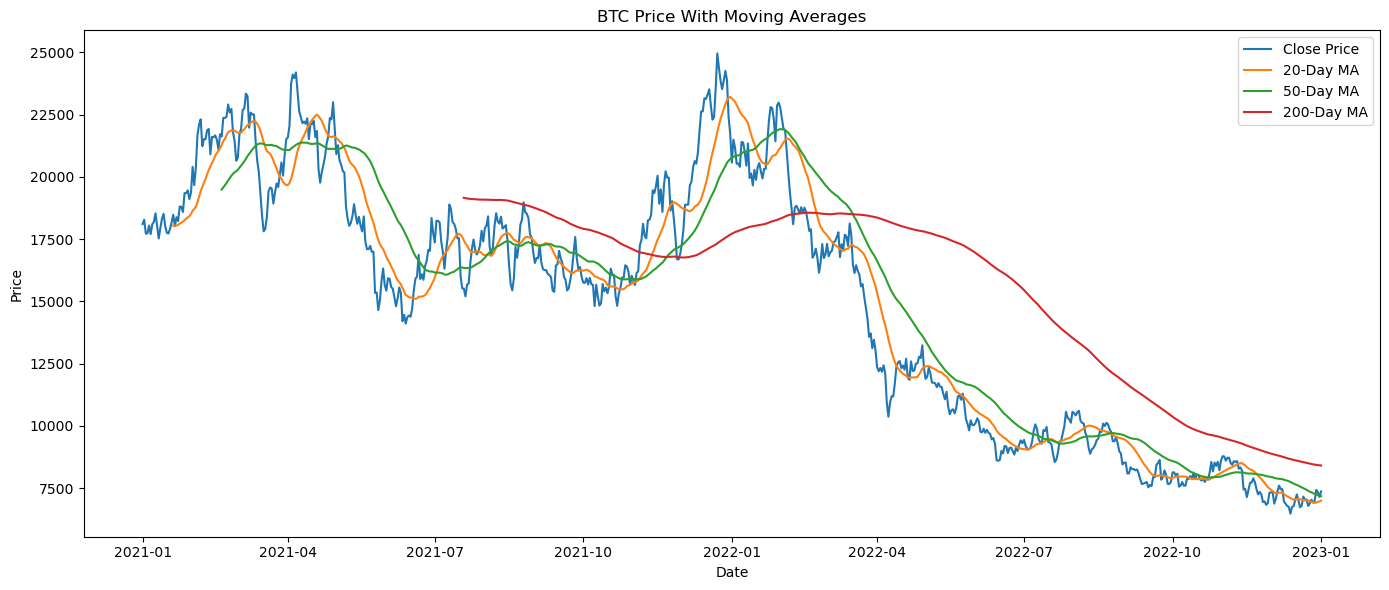

In [89]:
symbol = "BTC"

df_symbol = df[df["Symbol"] == symbol]

plt.figure(figsize=(14,6))
plt.plot(df_symbol["Date"], df_symbol["Close"], label="Close Price")
plt.plot(df_symbol["Date"], df_symbol["MA-20"], label="20-Day MA")
plt.plot(df_symbol["Date"], df_symbol["MA-50"], label="50-Day MA")
plt.plot(df_symbol["Date"], df_symbol["MA-200"], label="200-Day MA")

plt.title(f"{symbol} Price With Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


# Asset Price Trends Over Time

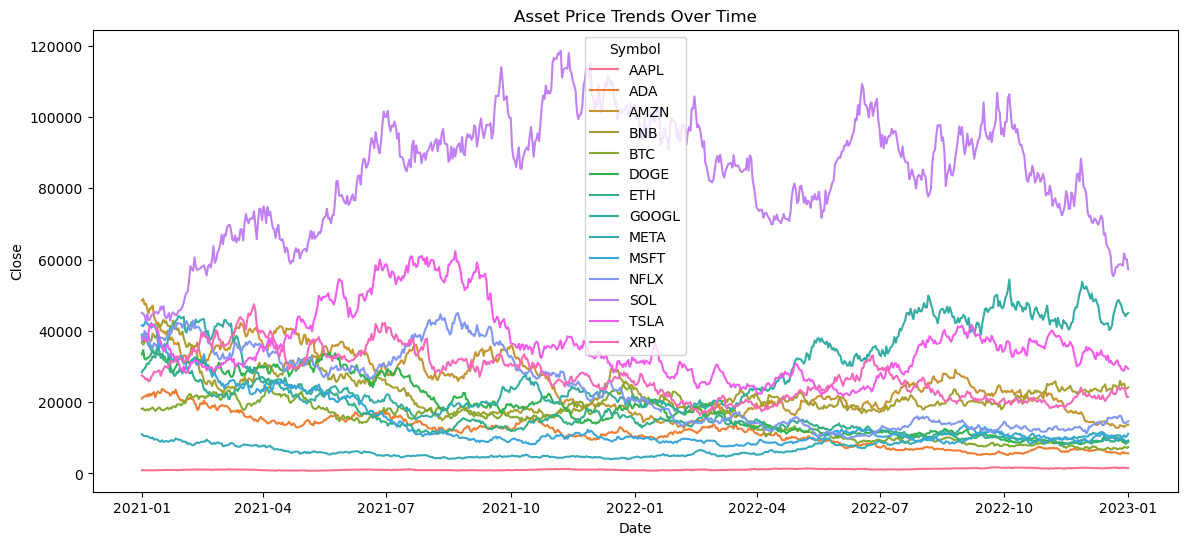

In [90]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="Date", y="Close", hue="Symbol")
plt.title("Asset Price Trends Over Time")
plt.show()


In [45]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Return,Volatility_30,MA-20,MA-50,MA-200
0,2021-01-01,AAPL,908.14,939.56,898.44,918.10,6670055.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,ADA,20868.65,22001.92,20192.28,21050.33,6707673.0,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,AMZN,48261.49,50893.40,47081.08,48561.76,6294934.0,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,BNB,36255.41,38420.07,36116.84,36697.61,2429383.0,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,BTC,17856.23,18157.94,17984.22,18105.36,4528669.0,NaN,NaN,NaN,NaN,NaN


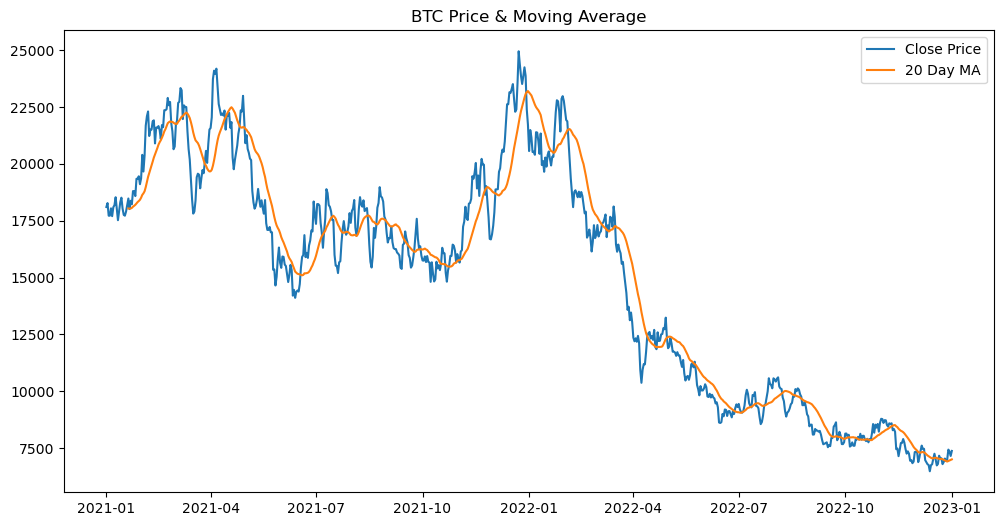

In [43]:
symbol = "BTC"
temp = df[df["Symbol"] == symbol]

plt.figure(figsize=(12,6))
plt.plot(temp["Date"], temp["Close"], label="Close Price")
plt.plot(temp["Date"], temp["MA-20"], label="20 Day MA")
plt.title(f"{symbol} Price & Moving Average")
plt.legend()
plt.show()


# Returns Distribution


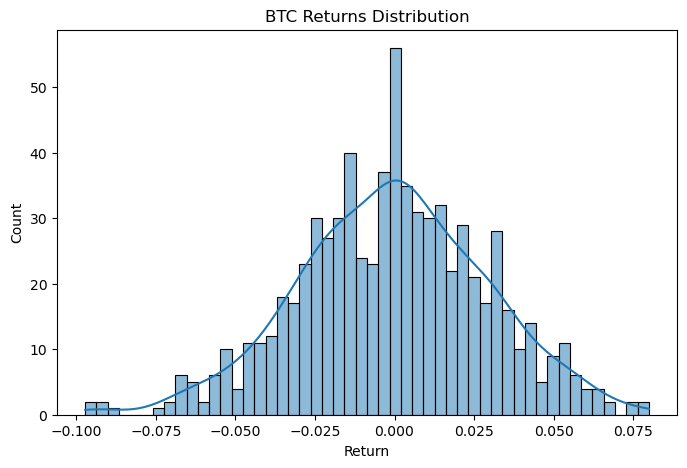

In [91]:
plt.figure(figsize=(8,5)) 
sns.histplot(temp["Return"], bins=50, kde=True)
plt.title(f"{symbol} Returns Distribution") 
plt.show()

# Volatility Over Time

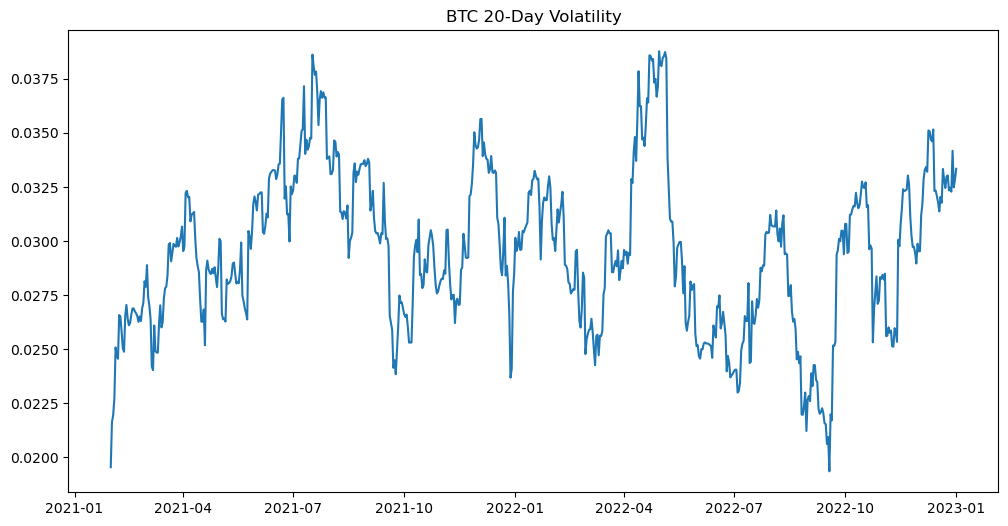

In [50]:
plt.figure(figsize=(12,6))
plt.plot(temp["Date"], temp["Volatility_30"])
plt.title(f"{symbol} 20-Day Volatility")
plt.show()


# Correlation Heatmap

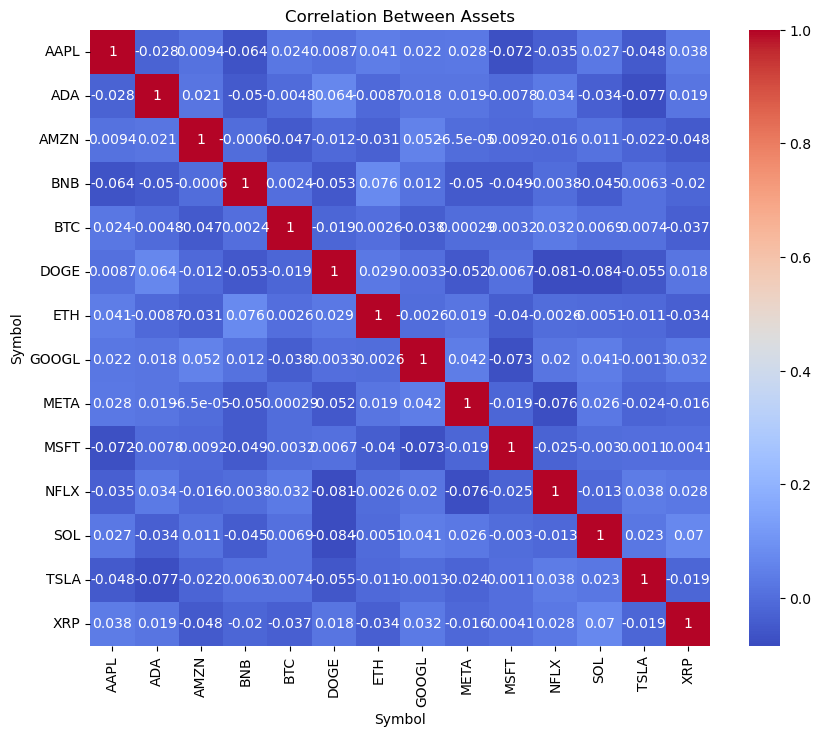

In [52]:
corr = df.pivot_table(
    values="Return",
    index="Date",
    columns="Symbol"
).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Assets")
plt.show()
